In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we generate data of the form y = ax^n + e (where e is Gaussian noise)
a = 0.35

n = 2
nr_datapoints = 500
x_data = np.linspace(-3, 3, nr_datapoints)
y_data = a*x_data**n + 0.1*np.random.normal(0,1,nr_datapoints)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()
hidden_nodes = 3
model.add(Dense(hidden_nodes, activation="sigmoid", input_shape=(1,)))
model.add(Dense(hidden_nodes, activation="relu", input_shape=(hidden_nodes,)))
model.add(Dense(1, activation=None, input_shape=(hidden_nodes, )))

custom_adam = Adam(learning_rate=0.1, # step-size (can overshoot when too larger)
                   beta_1=0.9, 
                   beta_2=0.999, 
                   epsilon=0.00000001, 
                   decay=0.0, 
                   amsgrad=False)
model.compile(loss = 'mse', optimizer=custom_adam, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


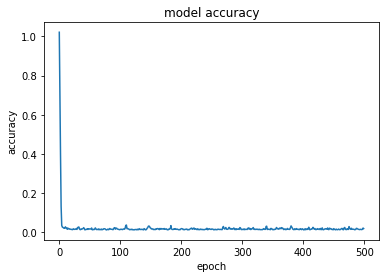

In [4]:
fit_history = model.fit(
    x_data, 
    y_data, 
    epochs=500, # how may times do we go through the entire dataset
    verbose=0 # set to '2' to print progress bar
)

plt.plot(fit_history.history['loss'])
#plt.plot(fit_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [5]:
model_predictions = model.predict(
    x_data, 
    batch_size=1, 
    verbose=0)

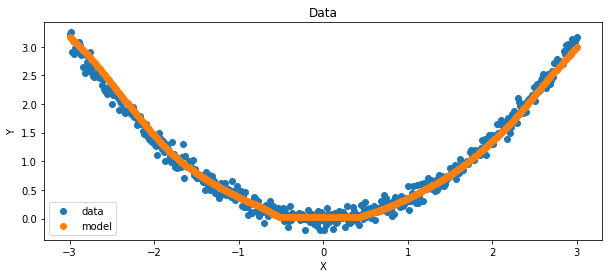

In [6]:
plt.figure(figsize=(10,4))
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_data, y_data, label="data")
plt.scatter(x_data, model_predictions, label="model")
plt.legend()
plt.show()